# Limpieza de datos

---

César Alejandro Cruz Salas

Rodrigo de la Garza Martínez

Francisco José Joven Sánchez

David Emiliano Mireles Cárdenas

Marlon Brandon Romo López

Mario Javier Soriano Aguilera


## Preparación inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

In [ ]:
ruta_archivo_test = '/content/drive/MyDrive/test.csv'
ruta_archivo_train = '/content/drive/MyDrive/train.csv'
ruta_archivo_gender_submission = '/content/drive/MyDrive/gender_submission.csv'

datos_test = pd.read_csv(ruta_archivo_test)
datos_train = pd.read_csv(ruta_archivo_train)
datos_gendersubmission = pd.read_csv(ruta_archivo_gender_submission)



##Análisis exploratorio

In [ ]:
datos_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
datos_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
datos_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Observamos las estadísticas descriptivas de las columnas.

In [ ]:
datos_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
datos_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observamos que existe una cantidad considerable de filas sin edad. Asimismo la mayoría de las filas no contienen información acerca de la cabina. En el caso de las cabinas esto hace sentido, ya que muchos pasajeros no contaban con una.

In [ ]:
datos_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
datos_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

*Pclass*, *Survived*, *PassengerId* están como datos numéricos cuando son categoricos u ordinales.

In [ ]:
# Matriz de correlación de datos de prueba
corr_matrix = datos_test.corr()
print(corr_matrix)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.034102  0.003818  0.043080  0.008211
Pclass         -0.026751  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age            -0.034102 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp           0.003818  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch           0.043080  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare            0.008211 -0.577147  0.337932  0.171539  0.230046  1.000000


<ipython-input-41-241599cf2be7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datos_test.corr()


In [ ]:
# Matriz de correlación de datos de entrenamiento
corr_matrix = datos_train.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-42-dc4b509fb940>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datos_train.corr()


Falta de correlación lineal entre cualquier par de variables. Un modelo de regresión lineal no sería util, primeramente ya que el objetivo es predecir (clasificar) un valor boleano (sobrevivió/no sobrevivió) y en segundo lugar con los datos en su estado actual no existen correlaciones lineales.

<Axes: xlabel='age'>

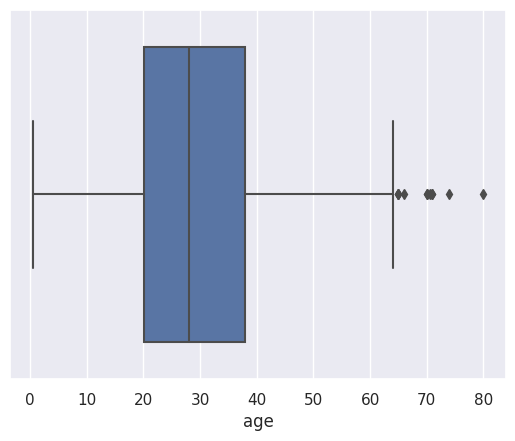

In [ ]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df["age"])

Varios outliers en el rango superior de edad.

<Axes: xlabel='age', ylabel='class'>

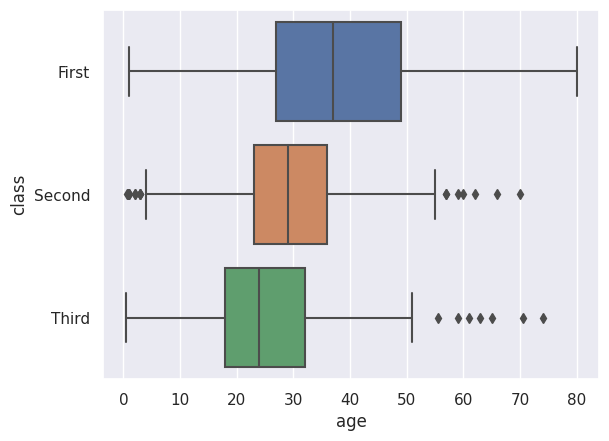

In [ ]:
sns.boxplot(data=df, x="age", y="class")

<Axes: xlabel='age', ylabel='class'>

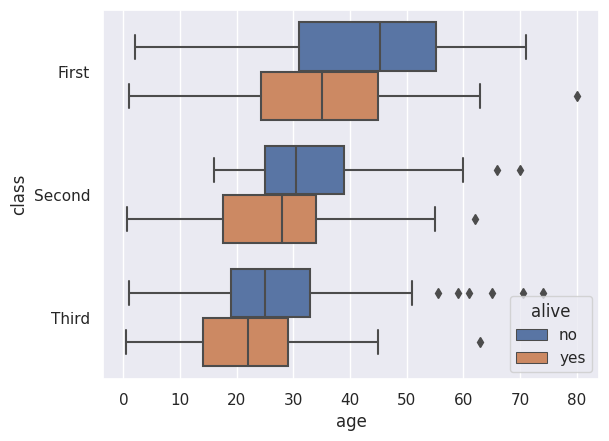

In [ ]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

Para las tres clases el rango de edad de los sobrevivientes abarca edades más jovenes, sobre todo si se ignorarn los pocos outliers.

<Axes: xlabel='fare', ylabel='alive'>

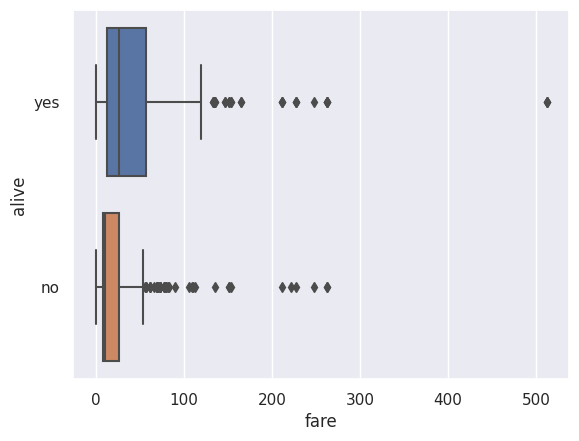

In [ ]:
sns.boxplot(data=df, x="fare", y="alive", order=["yes", "no"])

Para los que no sobrevivieron los cuartiles de pasaje están concentrados en un rango de edad muy corto e inclinado hacia valores más bajos en comparación con quienes si sobrevivieron.

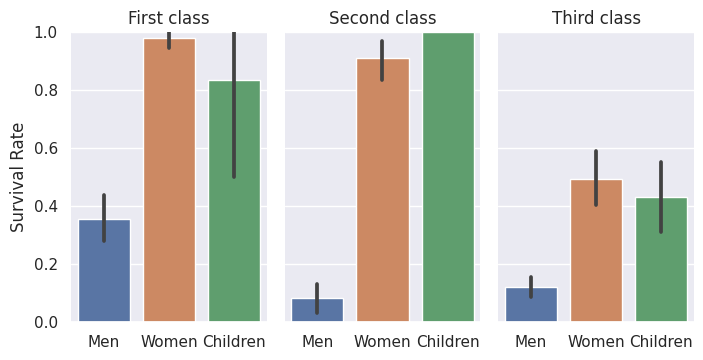

In [ ]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

En las tres clases la tasa de superviviencia de hombres está muy por debajo a aquella de mujeres y niños.

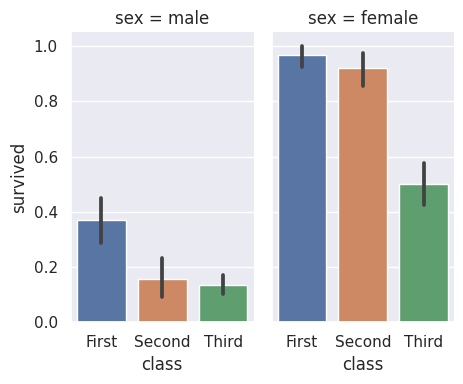

In [ ]:
sns.catplot(
    data=df, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
)

En hombres y mujeres la mayor cantidad de sobrevivientes son de primera clase.

<Axes: xlabel='class', ylabel='count'>

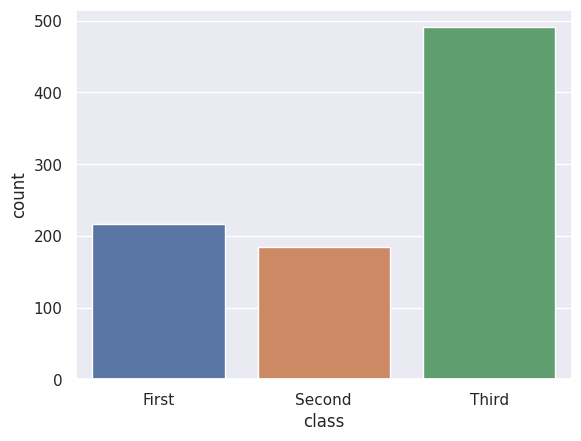

In [ ]:
sns.countplot(x=df["class"])

<Axes: xlabel='class', ylabel='count'>

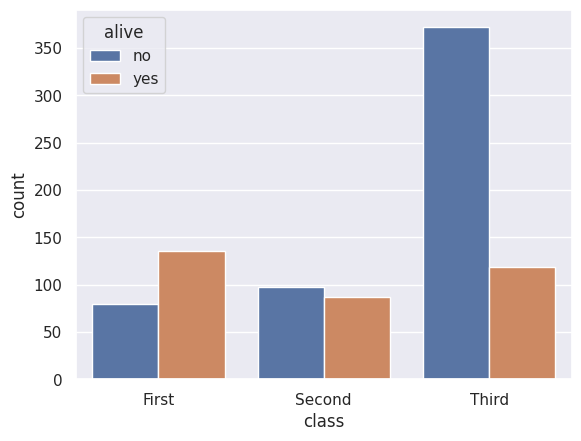

In [ ]:
sns.countplot(data=df, x="class", hue="alive")

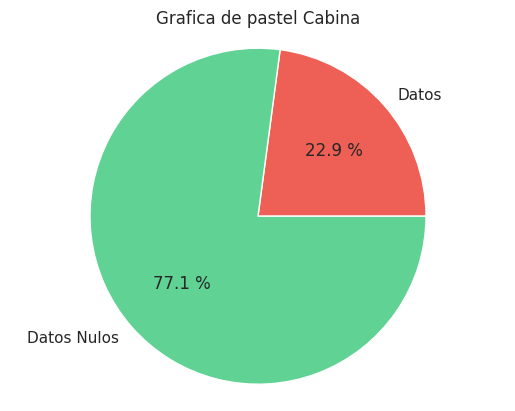

In [ ]:
colores = ["#EE6055","#60D394"]
plt.pie([datos_train['Cabin'].notna().sum(), datos_train['Cabin'].isna().sum()
], labels = ['Datos', 'Datos Nulos'], autopct="%0.1f %%", colors = colores)
plt.axis('equal')
plt.title('Grafica de pastel Cabina')
plt.show()

77.1% de las filas no tienen información acerca de las cabinas.

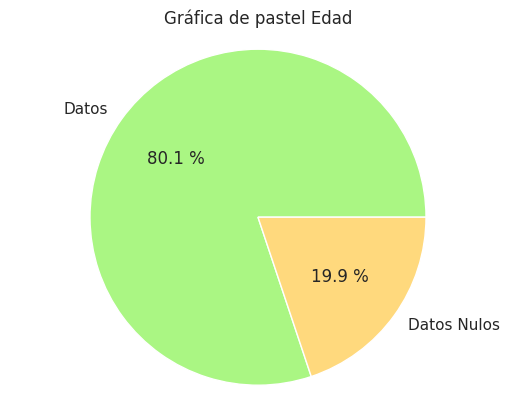

In [ ]:
colores = ["#AAF683","#FFD97D"]
plt.pie([datos_train['Age'].notna().sum(), datos_train['Age'].isna().sum()
], labels = ['Datos', 'Datos Nulos'], autopct="%0.1f %%", colors = colores)
plt.axis('equal')
plt.title('Gráfica de pastel Edad')
plt.show()

19.9% de los datos no tienen información acerca de la edad.

In [ ]:
datos_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
datos_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
datos_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


La supervivencia es mucho menor en hombres que en mujeres.

In [ ]:
datos_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


La supervivencia es mauor entre aquellos que tienen una pareja/hermano.

In [ ]:
datos_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
women = datos_train.loc[datos_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = datos_train.loc[datos_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) +" % of women survived." )
print(str(rate_men) + " % of men survived." )

0.7420382165605095 % of women survived.
0.18890814558058924 % of men survived.


In [ ]:
datos_train['Survived'] = datos_train['Survived'].map({0:"not_survived", 1:"survived"})
datos_train['Survived']

0      not_survived
1          survived
2          survived
3          survived
4      not_survived
           ...     
886    not_survived
887        survived
888    not_survived
889        survived
890    not_survived
Name: Survived, Length: 891, dtype: object

In [ ]:

survived = datos_train.loc[datos_train.Survived == 'survived']
notSurvived = datos_train.loc[datos_train.Survived == 'not_survived']

print(str(len(survived)) + ' Sobrevivientes')
print(str(len(notSurvived)) + ' No sobrevivientes')



342 Sobrevivientes
549 No sobrevivientes


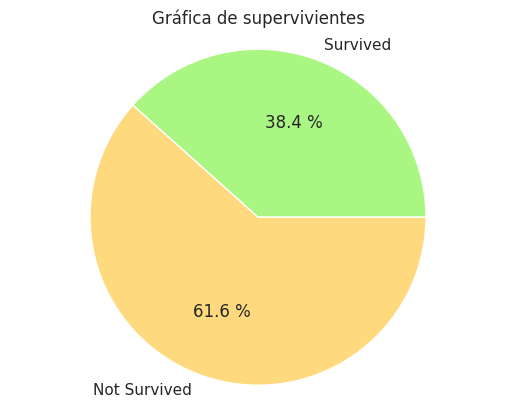

In [ ]:
plt.pie([len(survived), len(notSurvived)
], labels = ['Survived', 'Not Survived'], autopct="%0.1f %%", colors = colores)
plt.axis('equal')
plt.title('Gráfica de supervivientes')
plt.show()

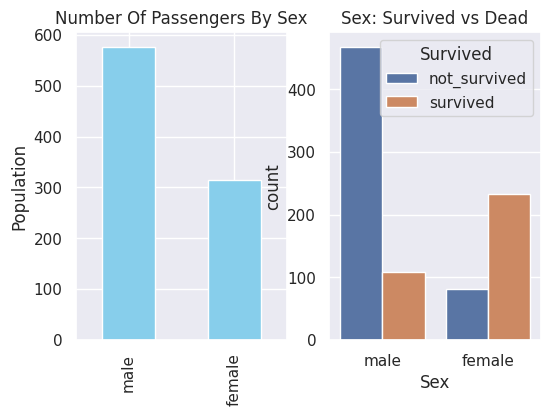

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 4))
datos_train["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot(x = "Sex", hue = 'Survived', data = datos_train, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

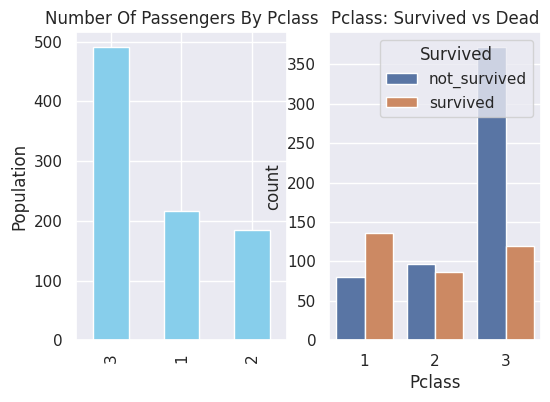

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 4))
datos_train["Pclass"].value_counts().plot.bar(color = "skyblue", ax =
ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x = "Pclass", hue = "Survived", data = datos_train, ax =ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

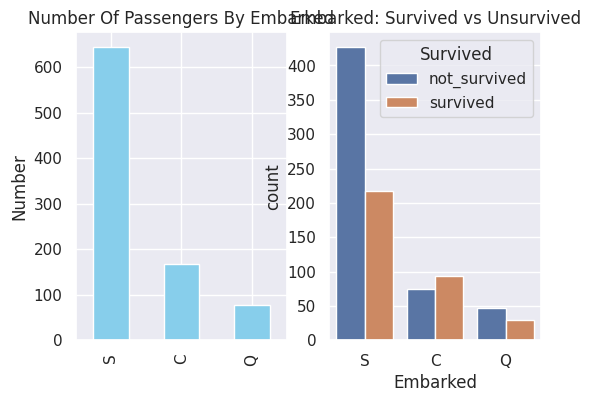

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 4))
datos_train["Embarked"].value_counts().plot.bar(color = "skyblue", ax =
ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x = "Embarked", hue = "Survived", data = datos_train, ax =
ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

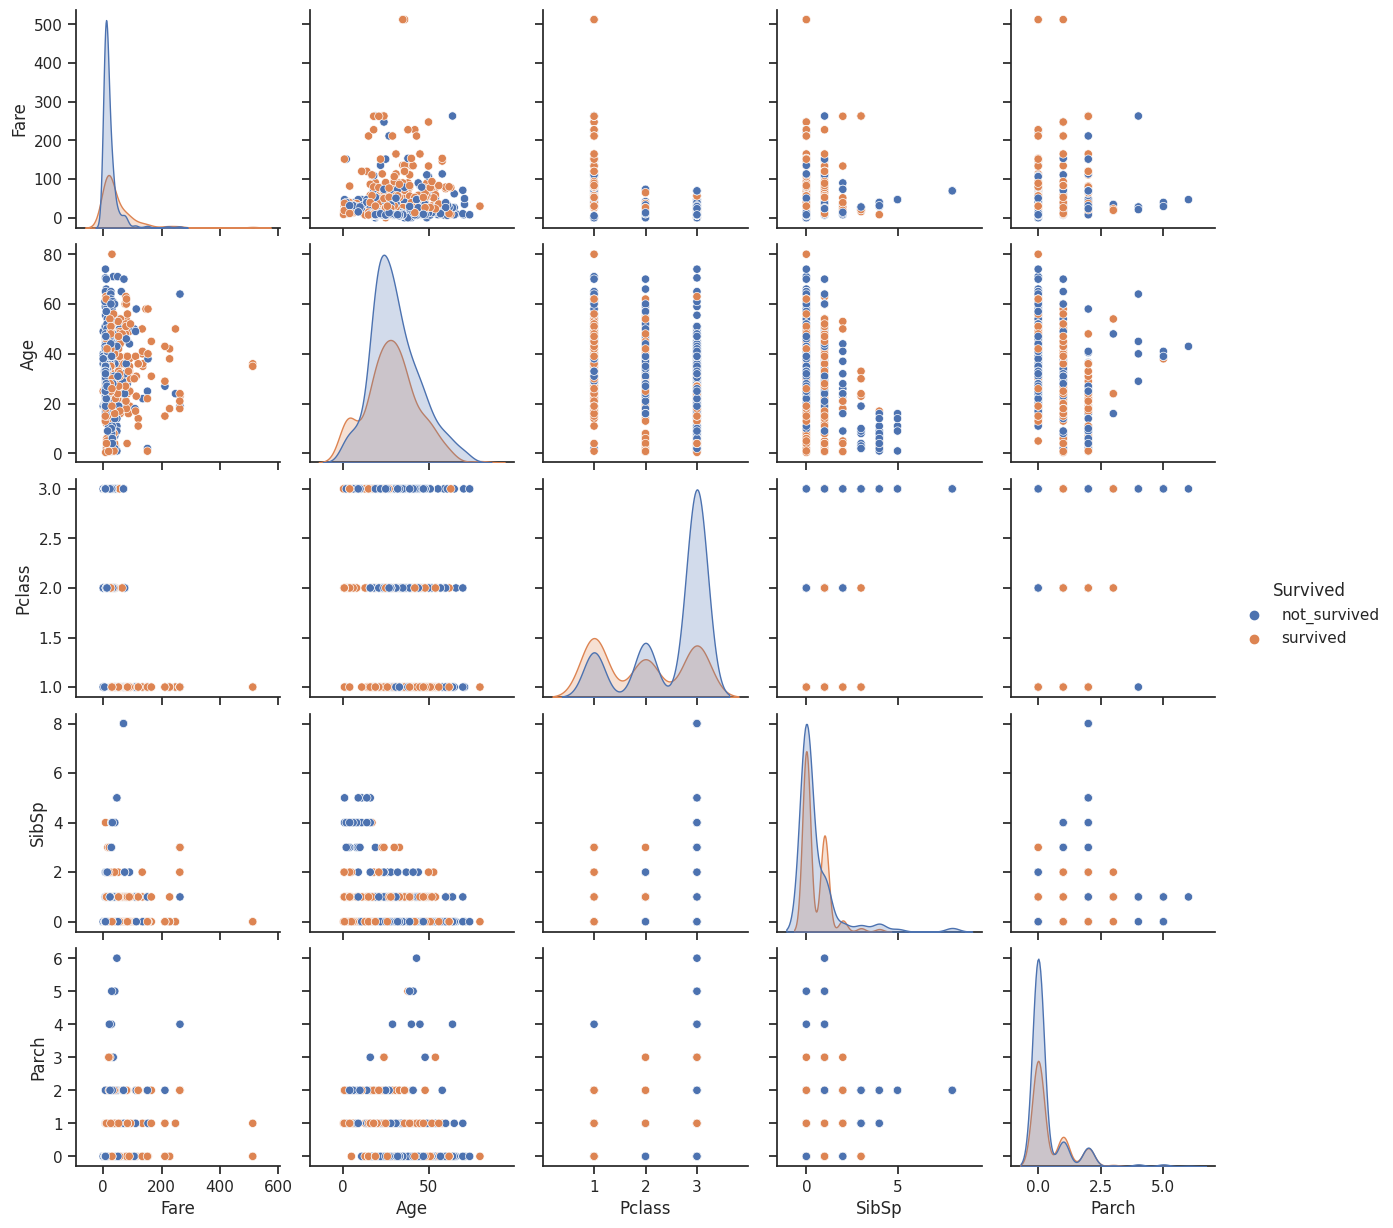

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(datos_train,vars = [ 'Fare','Age','Pclass', 'SibSp', 'Parch'],
hue="Survived")
plt.show()

Al muchos datos ser continuos no todas las secciones de esta gráfica son de gran utilidad. En cuanto a pasaje y edad se observa que los datos de quienes sobrevivieron y quienes no sobrevivieron están encimados.

In [ ]:
datos_train = datos_train.drop(columns = ['Embarked'])
datos_train['Survived'] = datos_train['Survived'].map({"not_survived":0,
"survived":1})
datos_train['Not_Survived'] = datos_train['Survived'].map({0:1,
1:0})
datos_train['Sex'] = datos_train['Sex'].map({"male":1,
"female":0})
datos_train['Cabin'] = np.where(datos_train['Cabin'].isnull(), 0, 1)

In [ ]:
datos_train['Childhood'] = datos_train.loc[(datos_train['Age'] >= 0) & (datos_train['Age'] <= 9), 'Age']
datos_train['Childhood'] = np.where(datos_train['Childhood'].isnull(), 0, 1)
datos_train['Adolescence'] = datos_train.loc[(datos_train['Age'] >= 10) & (datos_train['Age'] <= 20), 'Age']
datos_train['Adolescence'] = np.where(datos_train['Adolescence'].isnull(), 0, 1)
datos_train['Adulthood '] = datos_train.loc[(datos_train['Age'] >= 21) & (datos_train['Age'] <= 39), 'Age']
datos_train['Adulthood '] = np.where(datos_train['Adulthood '].isnull(), 0, 1)
datos_train['MiddleAge '] = datos_train.loc[(datos_train['Age'] >= 40) & (datos_train['Age'] <= 59), 'Age']
datos_train['MiddleAge '] = np.where(datos_train['MiddleAge '].isnull(), 0, 1)
datos_train['EarlyElder '] = datos_train.loc[(datos_train['Age'] >= 60) & (datos_train['Age'] <= 80), 'Age']
datos_train['EarlyElder '] = np.where(datos_train['EarlyElder '].isnull(), 0, 1)

In [ ]:
Tcorrelation = datos_train.corr(method='pearson')
Tcorrelation

<ipython-input-68-80b6c13dd904>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = datos_train.corr(method='pearson')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Not_Survived,Childhood,Adolescence,Adulthood,MiddleAge,EarlyElder
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.019919,0.005007,-0.022602,0.006964,0.009914,0.017734,0.006611
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.316912,-1.000000,0.128812,-0.006212,0.021516,0.009047,-0.040857
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.725541,0.338481,0.104857,0.106933,-0.034075,-0.246810,-0.159798
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.140391,0.543351,-0.075254,-0.040120,0.003552,-0.011199,0.072063
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.249732,0.077221,-0.544155,-0.381413,-0.053757,0.592626,0.474027
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.040460,0.035322,0.330474,0.029573,-0.138480,-0.069595,-0.045971
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.036987,-0.081629,0.346810,0.017958,-0.092050,0.010512,-0.015904
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.482075,-0.257307,-0.008962,-0.021407,0.030255,0.079626,0.039319
Cabin,0.019919,0.316912,-0.725541,-0.140391,0.249732,-0.040460,0.036987,0.482075,1.000000,-0.316912,-0.044043,-0.061594,0.005729,0.189818,0.111841
Not_Survived,0.005007,-1.000000,0.338481,0.543351,0.077221,0.035322,-0.081629,-0.257307,-0.316912,1.000000,-0.128812,0.006212,-0.021516,-0.009047,0.040857


<Axes: >

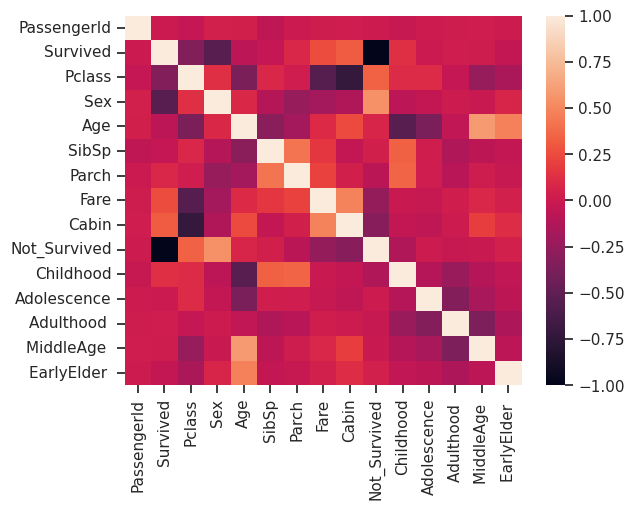

In [ ]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
 yticklabels=Tcorrelation.columns)


Se vuelve a observar muy poca correlación entre las variables.



---

# Notas nuestras para después

**Pasos por hacer:**



*   datos_train: columna Cabina (hacer remplazo por booleano), eliminar los poquitos datos de embarcacion(ver si tienen relevancia con respecto a su sexo, edad, embarcacion, clase), como sustituir los datos de edad(usar metodo de sustitucion por valor medio y algun metodo de regresion).

*   Observar que hay una gran diferencia entre el numero de muejeres que sobrevivieron con la de hombres. Lo mismo con el tipo de clase en la que pertenencen, la edad cuando es de entre 0-5 años tiene una alta relevancia (observar graficos de su distribucion dependiendo de su supervivencia o no superviviente), la embarcacion tiene alta relevancia para los que pertenecian a S.

*   Agregar variables a la matriz de correlacion: survived, not_survived




---


Data cleaning
- Age/Edad
    - Ver distribución de edad por título (dr, mr, mrs) y llenar filas con edad faltante de manera que cumplan con la distribución normal
- Embarcación
    - One hot encoding (cambiar nombres por números: 1,2 y 3)
- Fare/tarifa
    - Llenar faltantes viendo las estadísticas
    - Como solo falta una mejor poner dato aleatorio en un rango o si no la media
- Cabin/cabina
    - Cambiar de número de cabina a tiene o no tiene
    - También es opción borrar la columna
    - Otra opción es partir en letras de prefijo y números (e.g. “A-584” —> “A”, “584”)
